# Lab 4
Sławomir Górawski

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_real = np.random.randint(2, size=256)

In [3]:
x_qpsk_points = []
for i in range(0, 256, 2):
    x_qpsk_points.append({
        (1, 1): 1 + 1j,
        (1, 0): 1 - 1j,
        (0, 0): -1 -1j,
        (0, 1): -1 + 1j,
    }[(x_real[i], x_real[i + 1])])

x_qpsk = np.array(x_qpsk_points)

In [4]:
xp = np.array([1 + 1j for _ in range(128)])
xd = x_qpsk

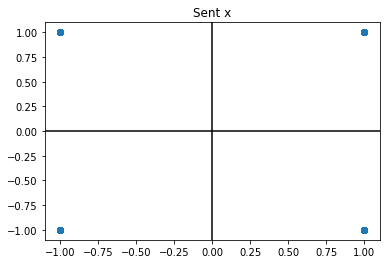

In [54]:
plt.scatter([p.real for p in xd], [p.imag for p in xd])
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.title("Sent x");

In [6]:
H = np.exp([1j * 2 * np.pi * i / 127 for i in range(128)])

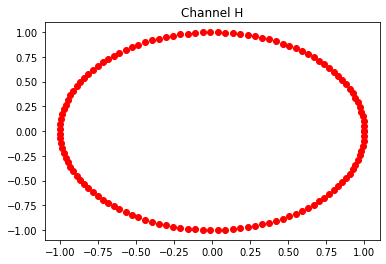

In [7]:
plt.scatter([p.real for p in H], [p.imag for p in H], color="red")
plt.title("Channel H");

In [8]:
awgn_real = np.random.normal(size=256)
awgn_imag = np.random.normal(size=256)
awgn = np.array([re + im * 1j for re, im in zip(awgn_real, awgn_imag)]) / np.sqrt(2)

In [79]:
snr = -20
n = awgn * 10 ** (-snr / 20)

In [80]:
n_p = n[:128]
n_d = n[128:]

In [81]:
yd = np.multiply(H, xd) + n_d
yp = np.multiply(H, xp) + n_p

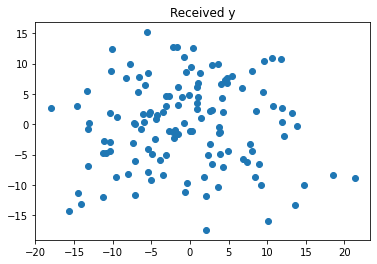

In [82]:
plt.scatter([p.real for p in yd], [p.imag for p in yd])
plt.title("Received y");

## Channel estimation

In [83]:
hest = np.multiply(np.multiply(np.multiply(np.conjugate(xp), xp) ** -1, np.conjugate(xp)), yp)

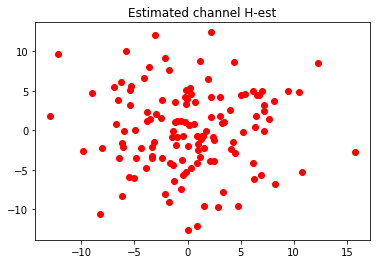

In [84]:
plt.scatter([p.real for p in hest], [p.imag for p in hest], color="red")
plt.title("Estimated channel H-est");

## Equalization

In [85]:
x_eq = yd / hest

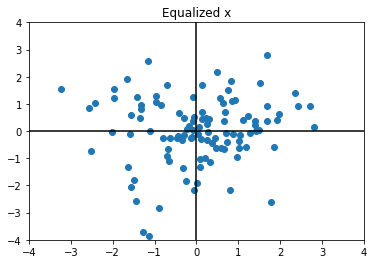

In [86]:
plt.scatter([p.real for p in x_eq], [p.imag for p in x_eq])
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.title("Equalized x");

## Demodulation

In [87]:
x_demod = []
for x_point in x_eq:
    if x_point.real > 0 and x_point.imag > 0:
        s = 1, 1
    elif x_point.real > 0 and x_point.imag <= 0:
        s = 1, 0
    elif x_point.real <= 0 and x_point.imag > 0:
        s = 0, 1
    else:
        s = 0, 0
    x_demod.extend(s)
x_demod = np.array(x_demod)

In [88]:
num_errors = 0
for x_point_orig, x_point_recv in zip(x_real, x_demod):
    if x_point_orig != x_point_recv:
        num_errors += 1
print("BER: %.2f" % (num_errors / 256))

BER: 0.51
